**Assignment 5**

**Name: Anuska Nath**

**IT (UG3), section:A3**

**Roll: 002311001003**

**Look at the classical Missionaries and Carnivals Problem.**

Before today's lab, you have either solved the same problem or some other related searching problems using different graph or
tree search algorithms.

Today, you have to use them all (BFS, DFS, DLS, IDS, ILS, and UCS) to solve the classical Missionaries and Carnivals  

Points to note:

1. For different, DLS and IDS, consider 3 different depths and run with the same configuration.
2. For, ILS and UCS, consider the misplaced tiles from the goal state as the cost of the operator.
3. Provide necessary inputs to the program. Do not statically mention any of the required parameters to run the setup inside
the program.
4. Collect the memory and time requirement for each run of the above algorithms along with different parameters for the same
algorithms (e.g., depth).
5. Input, output states and any other parameter required to run the algorithms must be written in a file (a separate
file for each of the algorithms to be prepared as separate inputs may be required for running each algorithm). Write the proper documentation of the input file.
6. Intermediate output shall be properly displayed and will be written in a separate output/log file.
7. Compare the time and memory requirements of the algorithms/same algorithms with separate input parameters in a table.
8. Draw any 3 plots to compare the time and memory requirement (3 for each) of the algorithm. Total of 6 plots. (3 different plots for memory requirement and 3 different plots for time requirement)


**Initial Common block for all the algorithms**

In [283]:
import time
import tracemalloc
import heapq
from collections import deque

# -----------------------------
# Problem Representation
# State = (M_left, C_left, Boat)
# Boat = 1 (left), 0 (right)
# -----------------------------
TOTAL_M = 3
TOTAL_C = 3

class MCState:
    def __init__(self, missionaries_left, cannibals_left, boat, parent=None):
        self.m_left = missionaries_left
        self.c_left = cannibals_left
        self.boat = boat   # 1 = boat on left, 0 = boat on right
        self.parent = parent

        # Total missionaries and cannibals (fixed)
        self.total_m = 3
        self.total_c = 3

    def is_valid(self):
        """Check if state is valid."""
        m_right = self.total_m - self.m_left
        c_right = self.total_c - self.c_left

        # Missionaries/cannibals cannot be negative or exceed total
        if not (0 <= self.m_left <= self.total_m and 0 <= self.c_left <= self.total_c):
            return False
        if not (0 <= m_right <= self.total_m and 0 <= c_right <= self.total_c):
            return False

        # Missionaries cannot be outnumbered on either side
        if (self.m_left > 0 and self.c_left > self.m_left):
            return False
        if (m_right > 0 and c_right > m_right):
            return False

        return True

    def is_goal(self, goal_state):
        """Check if current state matches the goal."""
        return (self.m_left, self.c_left, self.boat) == goal_state

    def generate_moves(self):
        """Generate all valid moves from current state."""
        moves = []
        if self.boat == 1:  # Boat on left side → move to right
            directions = [(-1, 0), (0, -1), (-2, 0), (0, -2), (-1, -1)]
            for dm, dc in directions:
                new_state = MCState(
                    self.m_left + dm,
                    self.c_left + dc,
                    0,  # move boat to right
                    parent=self
                )
                if new_state.is_valid():
                    moves.append(new_state)
        else:  # Boat on right side → move back to left
            directions = [(1, 0), (0, 1), (2, 0), (0, 2), (1, 1)]
            for dm, dc in directions:
                new_state = MCState(
                    self.m_left + dm,
                    self.c_left + dc,
                    1,  # move boat back to left
                    parent=self
                )
                if new_state.is_valid():
                    moves.append(new_state)
        return moves

    def get_path(self):
        """Reconstruct path from root to this state."""
        path = []
        node = self
        while node:
            path.append(str((node.m_left, node.c_left, node.boat)))
            node = node.parent
        return list(reversed(path))

    def __eq__(self, other):
        return (self.m_left, self.c_left, self.boat) == (other.m_left, other.c_left, other.boat)

    def __hash__(self):
        return hash((self.m_left, self.c_left, self.boat))

    def __str__(self):
        return f"({self.m_left}, {self.c_left}, {self.boat})"


def read_input_file(filename):
    start, goal = None, None
    with open(filename, "r") as f:
        lines = [line.strip() for line in f if line.strip() and not line.strip().startswith('#')]
    if "Start:" in lines:
        idx = lines.index("Start:") + 1
        start = tuple(map(int, lines[idx].split()))
    if "Goal:" in lines:
        idx = lines.index("Goal:") + 1
        goal = tuple(map(int, lines[idx].split()))
    return start, goal


def log_output(filename, algo, path, time_taken, memory, steps):
    with open(filename, "w") as f:
        f.write(f"Algorithm: {algo}\n")
        f.write(f"Time Taken: {time_taken:.5f} sec\n")
        f.write(f"Memory Used: {memory} KB\n")
        f.write(f"Steps: {steps}\n\n")
        f.write("Path:\n")
        if path:
            for state in path:
                f.write(str(state) + "\n")
        else:
            f.write("No solution found.\n")


def heuristic(state, goal):
    M_left, C_left, boat, M_right, C_right = state
    return M_left + C_left  # simple heuristic = people left to move

**Breadth First Search (BFS)**

In [284]:
def bfs(start, goal, output_file="bfs_output.txt"):
    import time, tracemalloc
    from collections import deque

    start_time = time.time()
    tracemalloc.start()

    start_node = MCState(*start)
    frontier = deque([start_node])
    explored = set()
    steps = 0

    while frontier:
        node = frontier.popleft()
        steps += 1

        if node.is_goal(goal):
            path = node.get_path()
            time_taken = time.time() - start_time
            memory = tracemalloc.get_traced_memory()[1] / 1024
            tracemalloc.stop()

            with open(output_file, "w") as f:
                f.write("=== BFS Output ===\n")
                f.write("\n")
                f.write(f"Start: {start}\nGoal: {goal}\n")
                f.write("\n")
                f.write(f"Time: {time_taken:.6f}s\n")
                f.write(f"Memory: {memory:.2f} KB\n")
                f.write(f"Steps: {len(path)-1}\n")
                f.write("\n")
                f.write("Path:\n" + "\n".join(path))


            return path, time_taken, memory, len(path)-1

        explored.add(node)
        for child in node.generate_moves():
            if child not in explored and child not in frontier:
                frontier.append(child)

    tracemalloc.stop()
    return None, 0, 0, 0


**Depth First Search (DFS)**

In [285]:
def dfs(start, goal, output_file="dfs_output.txt"):
    import time, tracemalloc

    start_time = time.time()
    tracemalloc.start()

    start_node = MCState(*start)
    stack = [start_node]
    explored = set()
    steps = 0

    while stack:
        node = stack.pop()
        steps += 1

        if node.is_goal(goal):
            path = node.get_path()
            time_taken = time.time() - start_time
            memory = tracemalloc.get_traced_memory()[1] / 1024
            tracemalloc.stop()

            with open(output_file, "w") as f:
                f.write("=== DFS Output ===\n")
                f.write("\n")
                f.write(f"Start: {start}\nGoal: {goal}\n")
                f.write("\n")
                f.write(f"Time: {time_taken:.6f}s\n")
                f.write(f"Memory: {memory:.2f} KB\n")
                f.write(f"Steps: {len(path)-1}\n")
                f.write("\n")
                f.write("Path:\n" + "\n".join(path))

            return path, time_taken, memory, len(path)-1

        explored.add(node)
        for child in node.generate_moves():
            if child not in explored:
                stack.append(child)

    tracemalloc.stop()
    return None, 0, 0, 0


**Depth Limit Search (DLS)**

In [286]:
def dls(start, goal, limit=20, output_file="dls_output.txt"):
    import time, tracemalloc

    start_time = time.time()
    tracemalloc.start()
    steps = 0

    def recursive_dls(node, depth):
        nonlocal steps
        steps += 1

        if node.is_goal(goal):
            return node.get_path()
        if depth == 0:
            return None

        for child in node.generate_moves():
            result = recursive_dls(child, depth - 1)
            if result is not None:
                return result
        return None

    start_node = MCState(*start)
    path = recursive_dls(start_node, limit)

    time_taken = time.time() - start_time
    memory = tracemalloc.get_traced_memory()[1] / 1024
    tracemalloc.stop()

    if path:
        with open(output_file, "w") as f:
            f.write("=== DLS Output ===\n")
            f.write("\n")
            f.write(f"Start: {start}\nGoal: {goal}\n")
            f.write("\n")
            f.write(f"Time: {time_taken:.6f}s\n")
            f.write(f"Memory: {memory:.2f} KB\n")
            f.write(f"Steps: {len(path)-1}\n")
            f.write("\n")
            f.write("Path:\n" + "\n".join(path))
        return path, time_taken, memory, len(path)-1

    return None, time_taken, memory, steps


**Iterative Deepening Search (IDS)**

In [287]:
def ids(start, goal, max_depth=20, output_file="ids_output.txt"):
    import time, tracemalloc

    start_time = time.time()
    tracemalloc.start()
    steps = 0

    def dls_inner(node, depth):
        nonlocal steps
        steps += 1
        if node.is_goal(goal):
            return node.get_path()
        if depth == 0:
            return None
        for child in node.generate_moves():
            result = dls_inner(child, depth - 1)
            if result:
                return result
        return None

    start_node = MCState(*start)
    path = None
    for depth in range(max_depth + 1):
        path = dls_inner(start_node, depth)
        if path:
            break

    time_taken = time.time() - start_time
    memory = tracemalloc.get_traced_memory()[1] / 1024
    tracemalloc.stop()

    if path:
        with open(output_file, "w") as f:
            f.write("=== IDS Output ===\n")
            f.write("\n")
            f.write(f"Start: {start}\nGoal: {goal}\n")
            f.write("\n")
            f.write(f"Time: {time_taken:.6f}s\n")
            f.write(f"Memory: {memory:.2f} KB\n")
            f.write(f"Steps: {len(path)-1}\n")
            f.write("\n")
            f.write("Path:\n" + "\n".join(path))
        return path, time_taken, memory, len(path)-1

    return None, time_taken, memory, steps


**Uniform Cost Search (UCS)**

In [288]:
def ucs(start, goal, output_file="ucs_output.txt"):
    start_time = time.time()
    tracemalloc.start()

    start_node = MCState(*start)
    frontier = []
    heapq.heappush(frontier, (0, 0, start_node))  # (cost, tie-breaker, node)
    explored = {start_node: 0}
    counter = 0

    with open(output_file, "w") as f:
        f.write("UCS Algorithm\n")
        f.write(f"Start: {start}\nGoal: {goal}\n\n")

        while frontier:
            cost, _, node = heapq.heappop(frontier)

            f.write(f"Exploring: {node}\n")

            if node.is_goal(goal):
                path = node.get_path()
                time_taken = time.time() - start_time
                memory = tracemalloc.get_traced_memory()[1] / 1024
                steps = len(path) - 1

                f.write("\nSolution found!\n")
                f.write(f"Path: {path}\n")
                f.write(f"Steps: {steps}\n")
                f.write(f"Time: {time_taken:.6f}s\n")
                f.write(f"Memory: {memory:.2f} KB\n")

                tracemalloc.stop()
                return path, time_taken, memory, steps

            for child in node.generate_moves():
                new_cost = cost + 1
                if child not in explored or new_cost < explored[child]:
                    explored[child] = new_cost
                    counter += 1
                    heapq.heappush(frontier, (new_cost, counter, child))

    tracemalloc.stop()
    return None, None, None, None


**Iterative Lengthening Search (ILS)**

In [289]:
def ils(start, goal, output_file="ils_output.txt"):
    import time, tracemalloc

    start_time = time.time()
    tracemalloc.start()

    bound = 1
    steps = 0
    start_node = MCState(*start)

    while True:
        frontier = [(0, start_node)]
        visited = set()

        while frontier:
            cost, node = frontier.pop(0)
            steps += 1

            if node.is_goal(goal):
                path = node.get_path()
                time_taken = time.time() - start_time
                memory = tracemalloc.get_traced_memory()[1] / 1024
                tracemalloc.stop()

                with open(output_file, "w") as f:
                    f.write("=== ILS Output ===\n")
                    f.write("\n")
                    f.write(f"Start: {start}\nGoal: {goal}\n")
                    f.write("\n")
                    f.write(f"Time: {time_taken:.6f}s\n")
                    f.write(f"Memory: {memory:.2f} KB\n")
                    f.write(f"Steps: {len(path)-1}\n")
                    f.write("\n")
                    f.write("Path:\n" + "\n".join(path))

                return path, time_taken, memory, len(path)-1

            visited.add(node)
            for child in node.generate_moves():
                new_cost = cost + 1
                if new_cost <= bound and child not in visited:
                    frontier.append((new_cost, child))

        bound += 1
        if bound > 50:  # safety stop
            break

    tracemalloc.stop()
    return None, 0, 0, steps


**Final Block to run all the algorthims and plot their used time and memory**


=== Algorithm Comparison ===
Algorithm  | Steps | Time (s)   | Memory (KB)
--------------------------------------------------
BFS        | 11    | 0.000700   | 4.98      
DFS        | 11    | 0.000536   | 3.55      
DLS        | 19    | 0.120538   | 8.56      
IDS        | 11    | 0.142044   | 5.04      
UCS        | 11    | 0.000536   | 9.23      
ILS        | 11    | 0.002792   | 4.93      


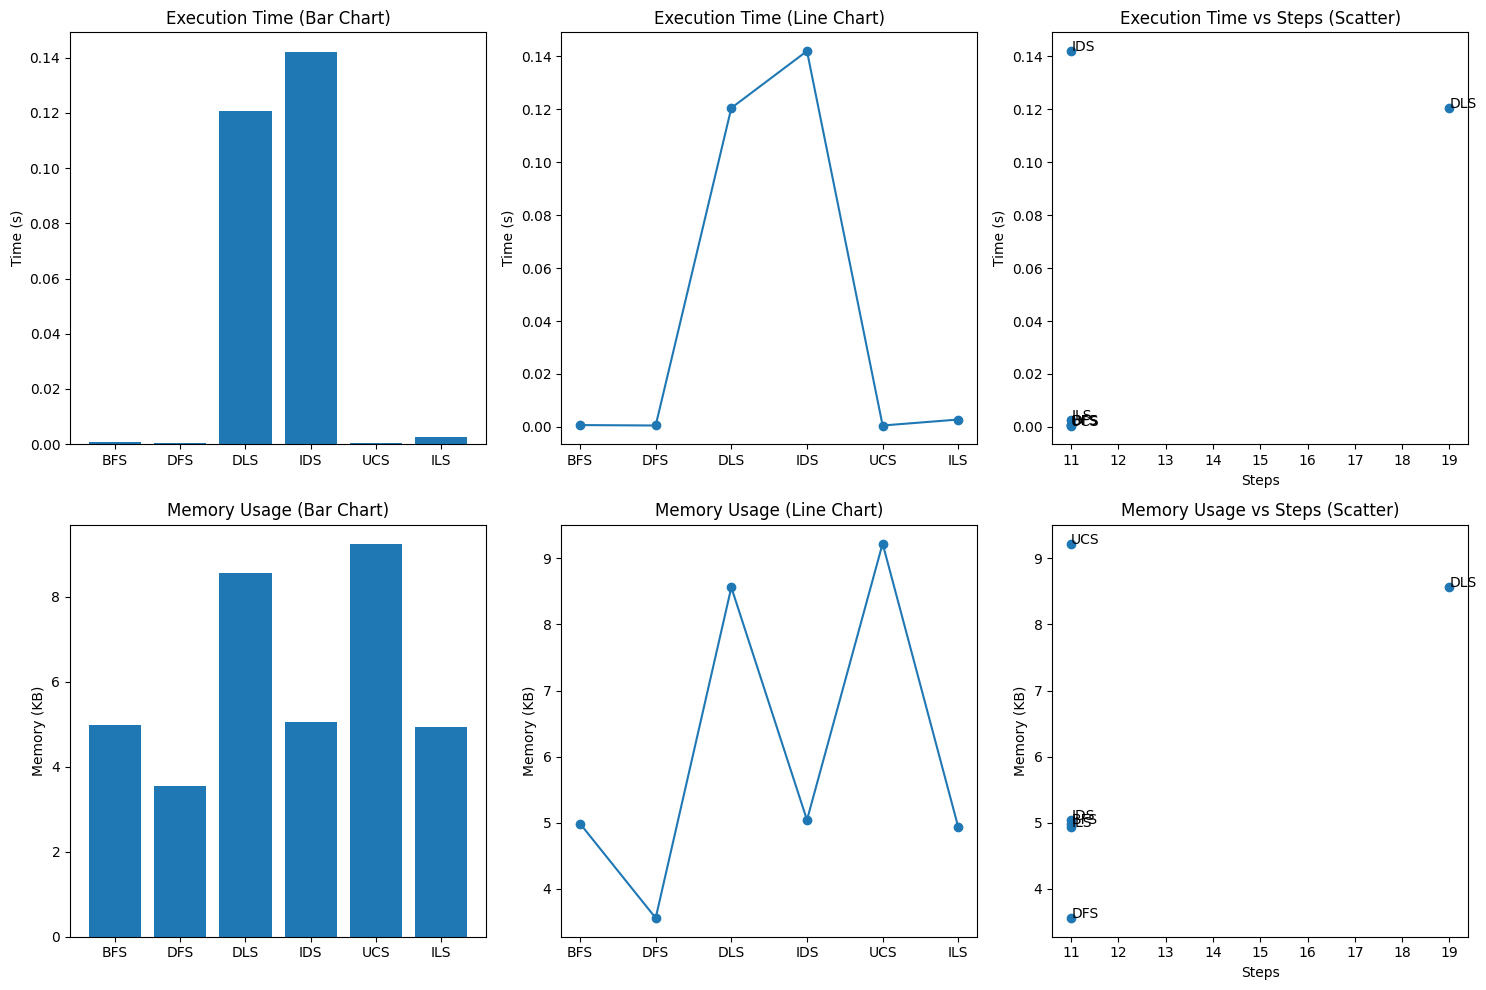

In [290]:
import matplotlib.pyplot as plt

# Run all algorithms in one go
start, goal = read_input_file("input.txt")

results = {}
results["BFS"] = bfs(start, goal)
results["DFS"] = dfs(start, goal)
results["DLS"] = dls(start, goal, limit=20)
results["IDS"] = ids(start, goal, max_depth=20)
results["UCS"] = ucs(start, goal)
results["ILS"] = ils(start, goal)

# === Console Comparison Table ===
print("\n=== Algorithm Comparison ===")
print(f"{'Algorithm':<10} | {'Steps':<5} | {'Time (s)':<10} | {'Memory (KB)':<10}")
print("-"*50)
for algo, (path, t, mem, steps) in results.items():
    print(f"{algo:<10} | {steps:<5} | {t:<10.6f} | {mem:<10.2f}")


# === Extract Data for Plots ===
algorithms = list(results.keys())
steps = [res[3] for res in results.values()]
times = [res[1] for res in results.values()]
memories = [res[2] for res in results.values()]

# === 3 Plots for Time ===
plt.figure(figsize=(15, 10))

# Bar plot (time)
plt.subplot(2, 3, 1)
plt.bar(algorithms, times)
plt.title("Execution Time (Bar Chart)")
plt.ylabel("Time (s)")

# Line plot (time)
plt.subplot(2, 3, 2)
plt.plot(algorithms, times, marker='o')
plt.title("Execution Time (Line Chart)")
plt.ylabel("Time (s)")

# Scatter plot (time vs steps)
plt.subplot(2, 3, 3)
plt.scatter(steps, times)
for i, algo in enumerate(algorithms):
    plt.text(steps[i], times[i], algo)
plt.title("Execution Time vs Steps (Scatter)")
plt.xlabel("Steps")
plt.ylabel("Time (s)")

# === 3 Plots for Memory ===
# Bar plot (memory)
plt.subplot(2, 3, 4)
plt.bar(algorithms, memories)
plt.title("Memory Usage (Bar Chart)")
plt.ylabel("Memory (KB)")

# Line plot (memory)
plt.subplot(2, 3, 5)
plt.plot(algorithms, memories, marker='o')
plt.title("Memory Usage (Line Chart)")
plt.ylabel("Memory (KB)")

# Scatter plot (memory vs steps)
plt.subplot(2, 3, 6)
plt.scatter(steps, memories)
for i, algo in enumerate(algorithms):
    plt.text(steps[i], memories[i], algo)
plt.title("Memory Usage vs Steps (Scatter)")
plt.xlabel("Steps")
plt.ylabel("Memory (KB)")

plt.tight_layout()
plt.show()

# === Save Console Output to File ===
with open("comparison_output.txt", "w") as f:
    f.write("=== Algorithm Comparison ===\n")
    f.write(f"{'Algorithm':<10} | {'Steps':<5} | {'Time (s)':<10} | {'Memory (KB)':<10}\n")
    f.write("-"*50 + "\n")
    for algo, (path, t, mem, steps) in results.items():
        f.write(f"{algo:<10} | {steps:<5} | {t:<10.6f} | {mem:<10.2f}\n")
